## Kernel Terbaik Laplacian Gamma 0.01 C 10

In [1]:
from sys import path
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI5 = pd.read_excel("DATA ISPU - Normalization.xlsx", sheet_name="DKI5")
X = DKI5.index.values.reshape(-1, 1)
y = DKI5['CO'].values.reshape(-1,)

# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)

gamma_value = 0.01
C_value=30

kfold = KFold(n_splits=5, shuffle=True)

In [2]:
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.059
MSE: 0.003
MAE: 0.038
R-squared: 0.717

Evaluation Metrics - Training Data:
RMSE: 0.037
MSE: 0.001
MAE: 0.023
R-squared: 0.886


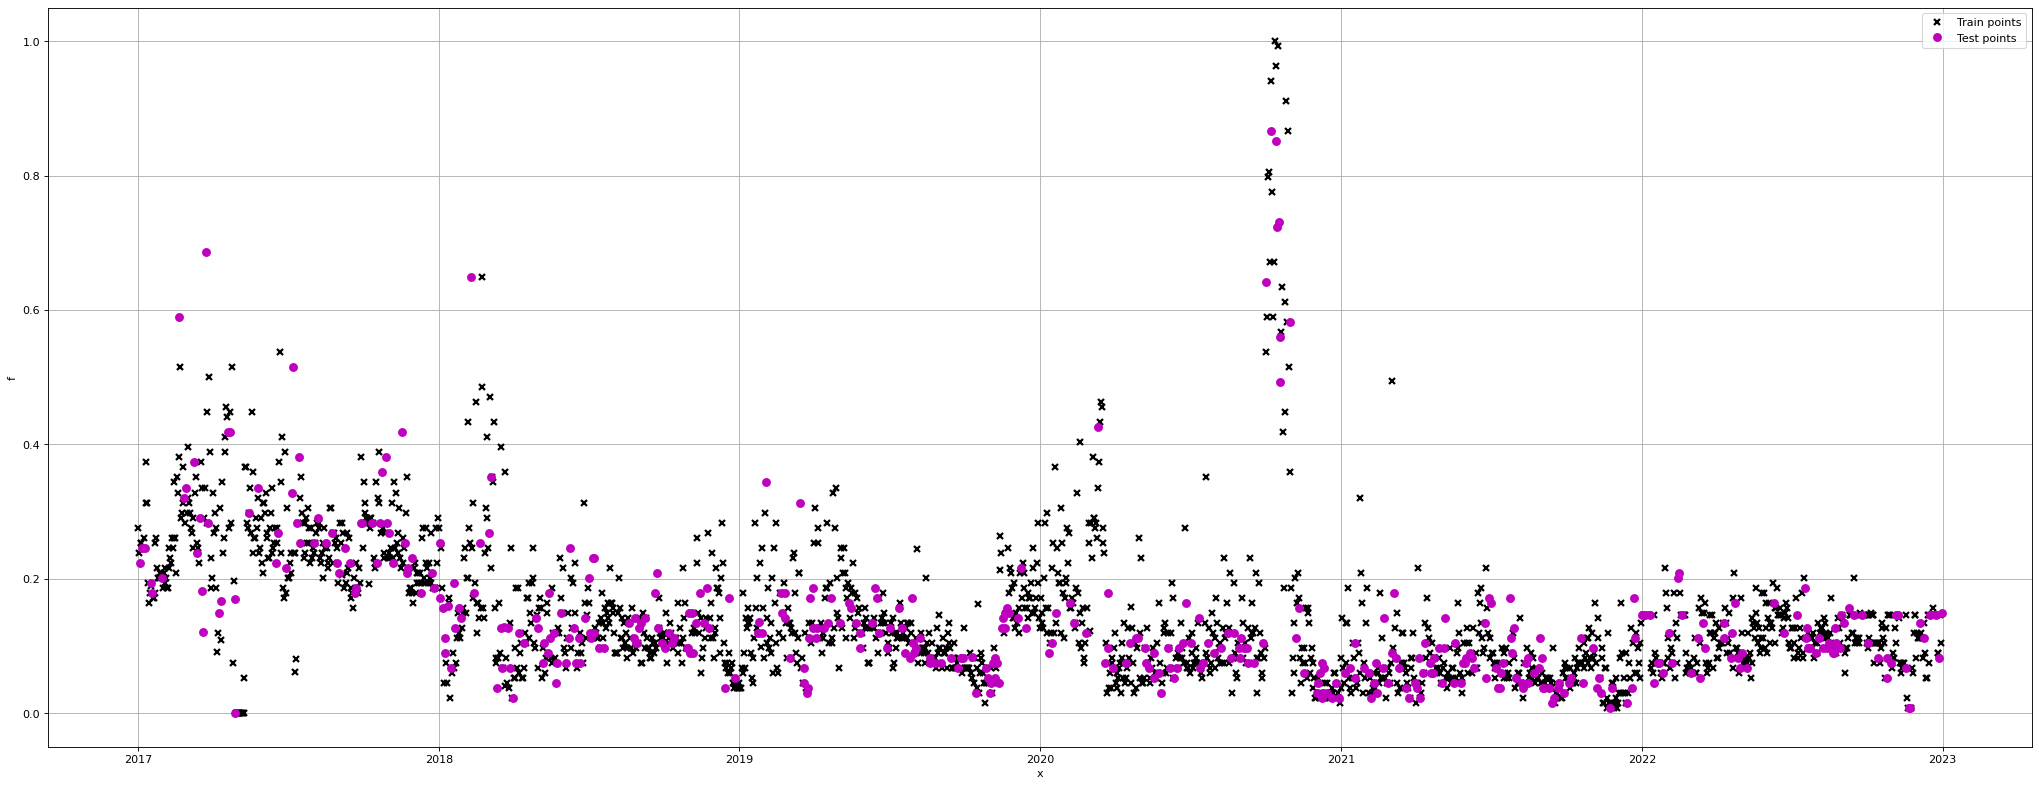

In [3]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI5['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI5['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

In [4]:
#Menampilkan Tabel Data Train dan prediksinya
import pandas as pd

# Menggabungkan tanggal, nilai PM10, dan hasil prediksi dalam DataFrame
results = pd.DataFrame({
    'Tanggal': np.array(DKI5['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1).flatten(),
    'CO': y_train,
    'Prediksi': y_train_pred.ravel()
})

# Menampilkan tabel hasil prediksi
print(results)

        Tanggal        CO  Prediksi
0    2017-01-01  0.276119  0.261194
1    2017-01-02  0.238806  0.253731
2    2017-01-04  0.253731  0.253731
3    2017-01-05  0.253731  0.253731
4    2017-01-07  0.246269  0.261194
...         ...       ...       ...
1748 2022-12-25  0.145988  0.122388
1749 2022-12-26  0.089552  0.104478
1750 2022-12-27  0.089552  0.104478
1751 2022-12-29  0.145988  0.119403
1752 2022-12-30  0.104478  0.111940

[1753 rows x 3 columns]


In [5]:
#Menampilkan Tabel Data Test dan prediksinya
import pandas as pd

# Menggabungkan tanggal, nilai PM10, dan hasil prediksi dalam DataFrame
results = pd.DataFrame({
    'Tanggal': np.array(DKI5['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1).flatten(),
    'CO': y_test,
    'Prediksi': y_pred.ravel()
})

# Menampilkan tabel hasil prediksi
print(results)

       Tanggal        CO  Prediksi
0   2017-01-03  0.223881  0.253731
1   2017-01-06  0.246269  0.261194
2   2017-01-09  0.246269  0.291045
3   2017-01-16  0.194030  0.189552
4   2017-01-18  0.179104  0.186567
..         ...       ...       ...
433 2022-12-09  0.111940  0.098507
434 2022-12-17  0.145988  0.119403
435 2022-12-24  0.145988  0.126866
436 2022-12-28  0.082090  0.108955
437 2022-12-31  0.149254  0.111940

[438 rows x 3 columns]


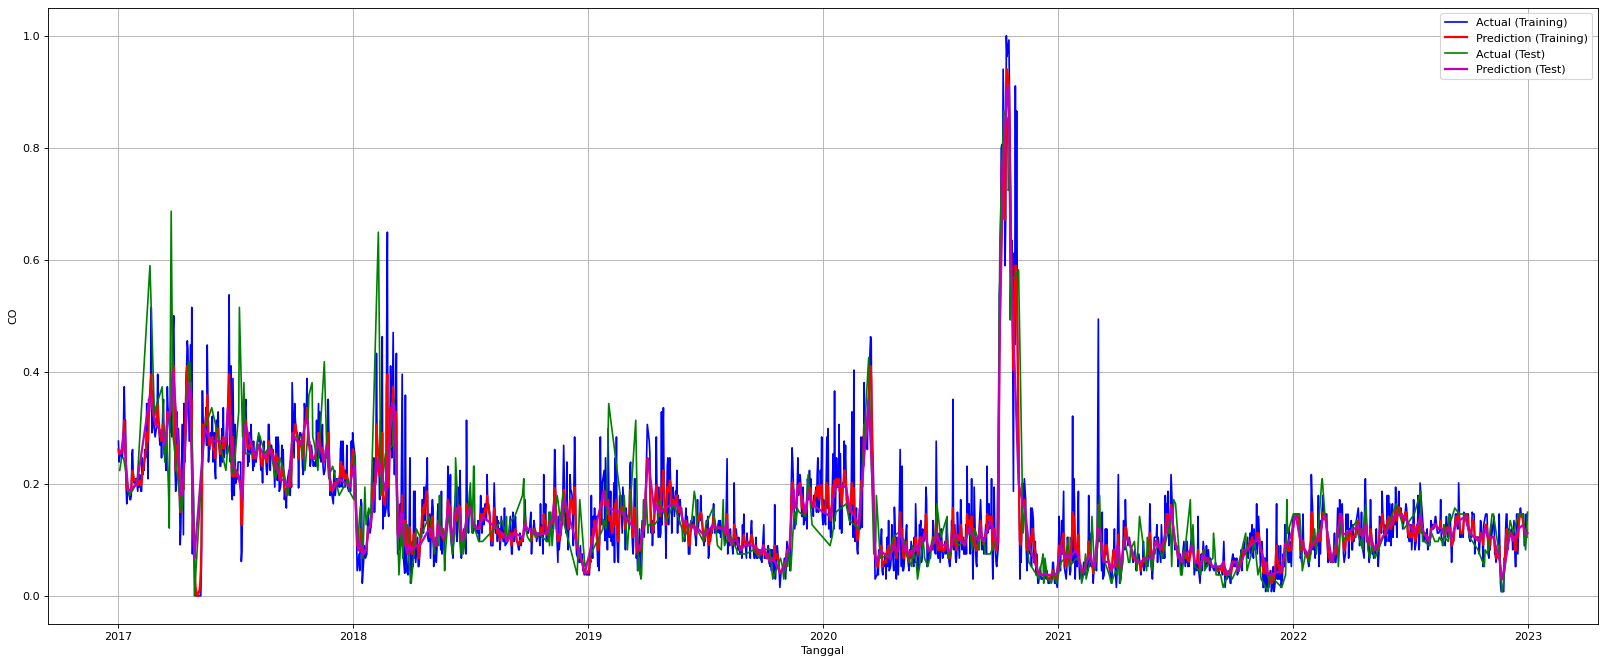

In [6]:
# Plot observations for training data
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(np.array(DKI5['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1), y_train, "b-", label='Actual (Training)')
plt.plot(np.array(DKI5['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1), y_train_pred, "r-", linewidth=2, label='Prediction (Training)')

# Plot observations for test data
plt.plot(np.array(DKI5['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1), y_test, "g-", label='Actual (Test)')
plt.plot(np.array(DKI5['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1), y_pred, "m-", linewidth=2, label='Prediction (Test)')

# Annotate plot
plt.xlabel("Tanggal")
plt.ylabel("CO")
plt.grid()
plt.legend()
plt.show()


In [7]:
max_value = 135
min_value = 1

# Denormalize training data
y_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
y_train_pred_denorm = (y_train_pred.flatten() * (max_value - min_value) + min_value)
date_train = np.array(DKI5['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1)

# Denormalize test data
y_test_denorm = (y_test.flatten() * (max_value - min_value) + min_value)
y_pred_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)
date_test = np.array(DKI5['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1)

# Membuat DataFrame untuk hasil prediksi data latih
results_train = pd.DataFrame({
    'Tanggal': date_train.flatten(),
    'CO': y_train_denorm,
    'Prediksi': y_train_pred_denorm
})

# Membuat DataFrame untuk hasil prediksi data uji
results_test = pd.DataFrame({
    'Tanggal': date_test.flatten(),
    'CO': y_test_denorm,
    'Prediksi': y_pred_denorm
})

# Menggabungkan DataFrame data latih dan data uji
results = pd.concat([results_train, results_test], axis=0)

# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
print(results)


Hasil Prediksi:
       Tanggal        CO  Prediksi
0   2017-01-01  38.00000      36.0
1   2017-01-02  33.00000      35.0
2   2017-01-04  35.00000      35.0
3   2017-01-05  35.00000      35.0
4   2017-01-07  34.00000      36.0
..         ...       ...       ...
433 2022-12-09  16.00000      14.2
434 2022-12-17  20.56244      17.0
435 2022-12-24  20.56244      18.0
436 2022-12-28  12.00000      15.6
437 2022-12-31  21.00000      16.0

[2191 rows x 3 columns]


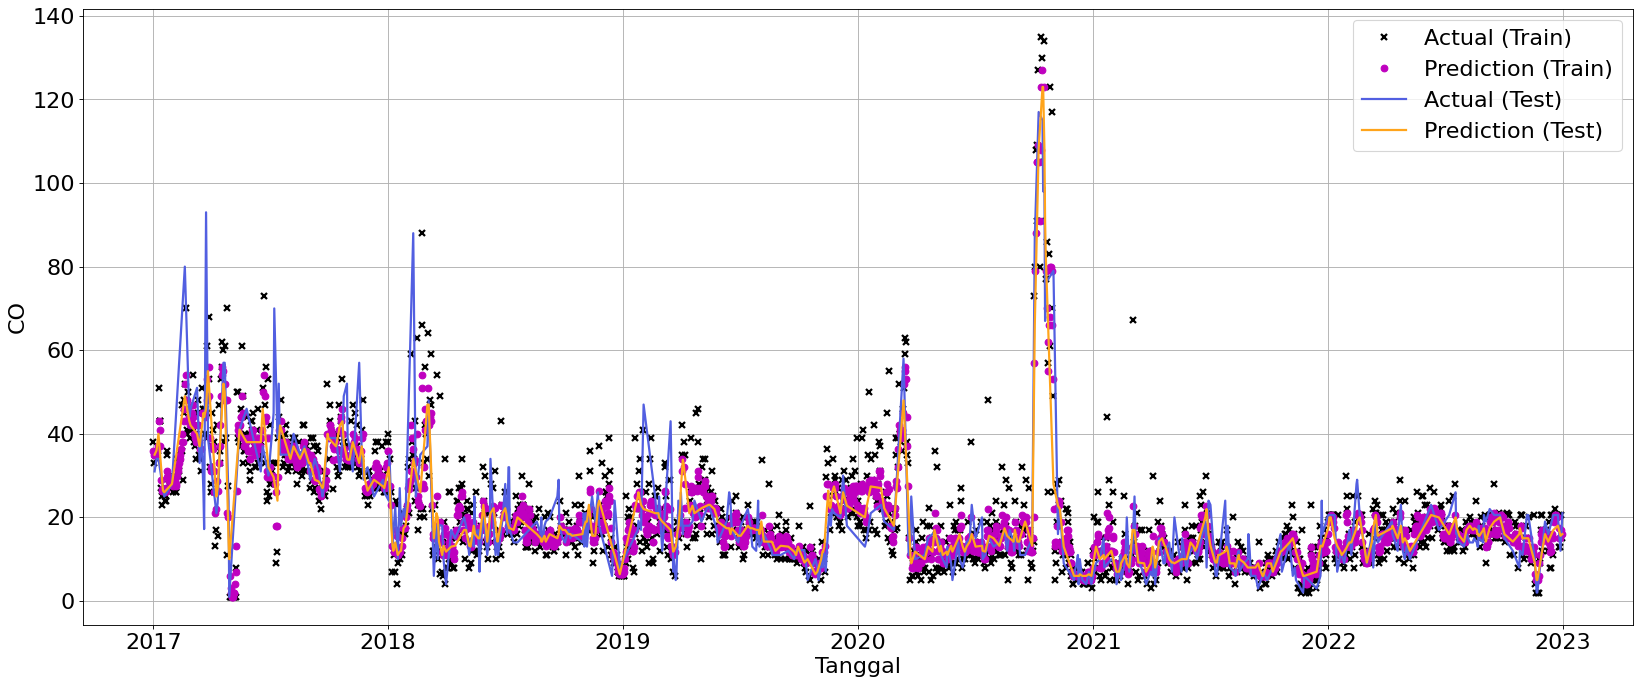

In [8]:
# Plot observations for training data
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(date_train, y_train_denorm, "kx", mew=2, label='Actual (Train)')
plt.plot(date_train, y_train_pred_denorm, "mo", mew=1, label='Prediction (Train)')

# Plot observations for test data
plt.plot(date_test, y_test_denorm, "#525FE1", linewidth=2, label='Actual (Test)')
plt.plot(date_test, y_pred_denorm, "#FFA41B", linewidth=2, label='Prediction (Test)')

# Annotate plot
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Tanggal", fontsize=20)
plt.ylabel("CO", fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.show()


In [10]:
# Menyimpan DataFrame ke dalam file Excel
results.to_excel('C:/OBIE/Tel - U/SEM 7/PTA/BISMILLAH/Code/TA_COBA_KELM1/prediksi/DKI5/DKI5_CO_prediksi.xlsx', index=False)